
### Séries Temporais.

Nesse notebook vamos analisar alguns modelos para tentar prever uma série temporal, em nosso caso, a série nos mostra a variação da quantidade de vendas de um determinado shampoo ao longo dos meses.

Iremos usar 2 modelos para nossa análise, um modelo classico (AR, MA ou ARMA) e o Prophet do facebook.

Vamos carregar as primeiras bibliotecas e fazer uma rápida análise em nosso Dateset.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('shampoo.csv')

df.head(7)

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8


In [3]:
df.shape

(36, 2)

Antes de tudo, iremos conferir se temos dados faltantes e outliers, afinal como estamos trabalhando com uma série temporal, podemos ter alguma data, como feriados e eventos, que por ventura, pode gerar algum outlier nas nossas vendas.

In [4]:
df.isnull().sum()

Month    0
Sales    0
dtype: int64

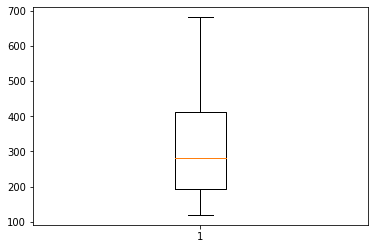

In [5]:
plt.boxplot(df['Sales'])
plt.show()

Não temos problemas com dados faltantes nem com outliers, podemos então plotar um gráfico:

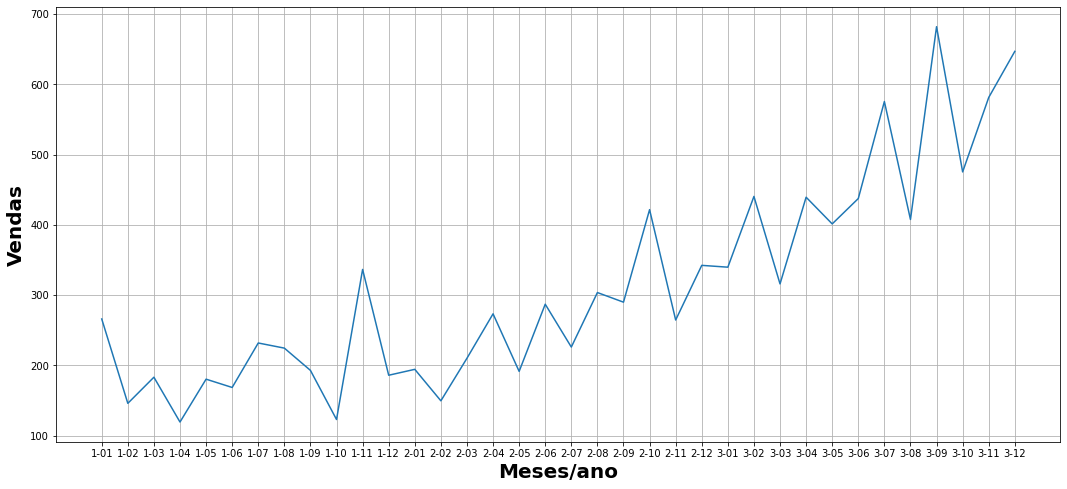

In [6]:
plt.figure(figsize=(18,8))
plt.plot(df['Month'],df['Sales'])
plt.ylabel('Vendas', fontsize = 20, fontweight = 'bold')
plt.xlabel('Meses/ano', fontsize = 20, fontweight = 'bold')
plt.grid()
plt.show()

Conseguimos observar graficamente o aumento de vendas com o passar dos meses e anos, e alguns picos ocorrendo sempre em algum dos últimos meses de cada ano.

Não conseguimos ver uma sazonalidade anual, porém podemos ver uma sazonalidade mensal, as vendas estão quase sempre diminuindo a aumentando mês a mês.

### Modelo clássico.

A função do python que nos permite automatizar o AR, MA e o ARMA, é a __ARIMA__ da biblioteca statsmodels, vamos importa-la:



In [7]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.5MB 5.7MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [8]:
from statsmodels.tsa.arima.model import ARIMA

Agora criaremos uma função genérica para criar os três tipos de modelos (AR, MA e ARMA)

In [9]:
def gerador_modelo_arima(data, p,q):
    model = ARIMA(data, order = [p, 0, q])
    model_fit = model.fit()
    return model_fit

O parâmetro p, nos diz a ordem que queremos nosso ter no modelo auto regressivo (AR) , e o parâmetro q, nos diz a ordem do modelo de Média móvel (MA), vamos criar 2 Modelos AR, 2 Modelos MA e 2 modelos ARMA e analisar os gráficos e parâmetros.

In [10]:
data = np.asarray(df['Sales'])

In [11]:
AR1 = gerador_modelo_arima(data,1,0)
AR2 = gerador_modelo_arima(data,2,0)
MA1 = gerador_modelo_arima(data,0,1)
MA2 = gerador_modelo_arima(data,0,2)
ARMA1 = gerador_modelo_arima(data, 1,1)
ARMA2 = gerador_modelo_arima(data, 2, 2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


#### Gráficos e parâmetros - AR1 ( p = 1, q = 0 )

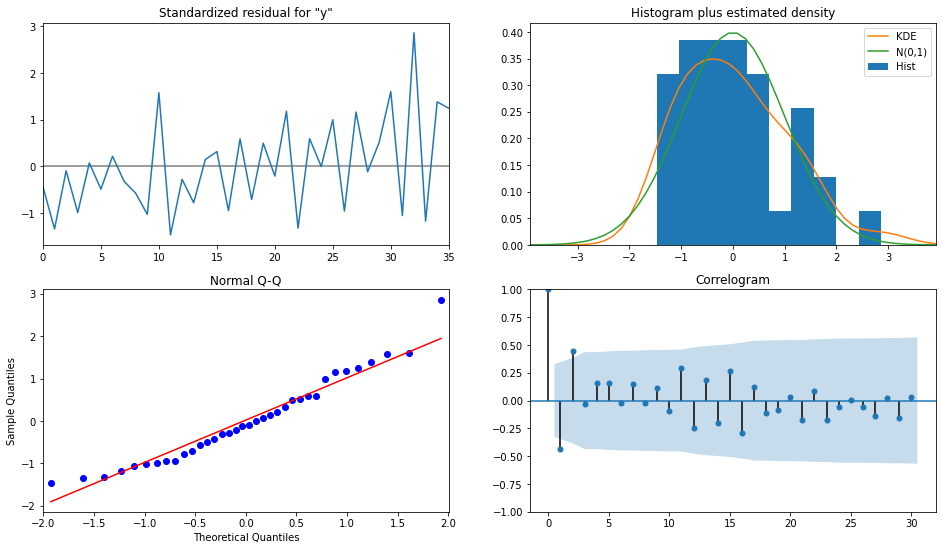

In [12]:
fig = plt.figure(figsize=(16,9))
fig = AR1.plot_diagnostics(fig=fig, lags=30)

In [13]:
AR1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -218.079
Date:                Tue, 29 Jun 2021   AIC                            442.157
Time:                        20:36:41   BIC                            446.908
Sample:                             0   HQIC                           443.815
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        333.2374     78.267      4.258      0.000     179.838     486.637
ar.L1          0.7509      0.128      5.872      0.000       0.500       1.002
sigma2      1.045e+04   2789.298      3.747      0.000    4985.064    1.59e+04
===================================================================================
Ljung-Box (L1) (Q):                   7.54   Jarque-Bera (JB):                 2.51
Prob(Q):                              0.01   Prob(JB):                         0.28
Heteroskedasticity (H):               2.16   Skew:                             0.65
Prob(H) (two-sided):                  0.20   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Dentre os parâmetros, temos que P> |z| está toda igual à zero, significando que não temos parametros iguais a zero, e nosso modelo não ta sendo rejeitado.

Quanto aos gráficos, nos resíduos, conseguimos detectar a mesma sazonalidade que vimos no gráfico, o que significa que o modelo deixou de detectar algo.

#### Gráficos e parâmetros - AR2 ( p = 2, q = 0 )

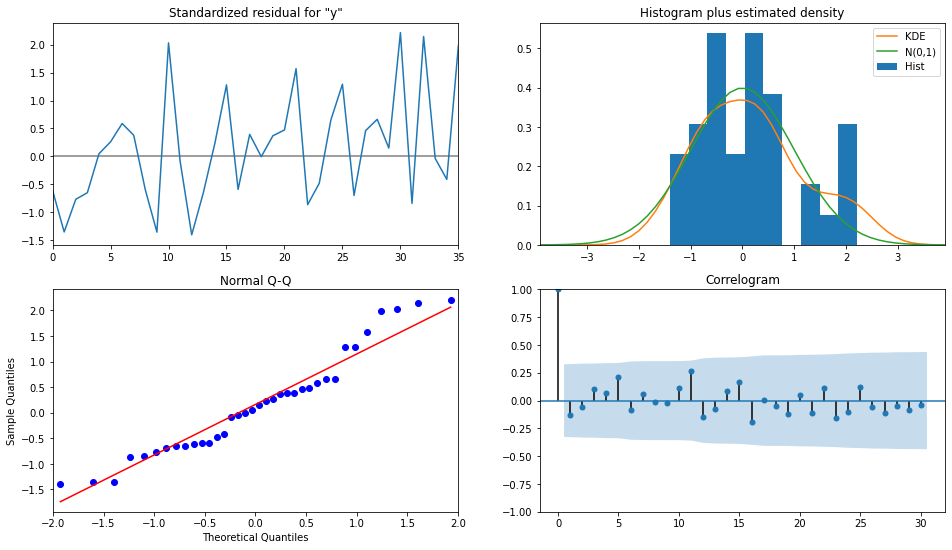

In [14]:
fig = plt.figure(figsize=(16,9))
fig = AR2.plot_diagnostics(fig=fig, lags=30)

In [15]:
AR2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -207.732
Date:                Tue, 29 Jun 2021   AIC                            423.465
Time:                        20:36:42   BIC                            429.799
Sample:                             0   HQIC                           425.676
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        379.0560    202.004      1.876      0.061     -16.865     774.977
ar.L1          0.2617      0.134      1.953      0.051      -0.001       0.524
ar.L2          0.6858      0.146      4.683      0.000       0.399       0.973
sigma2      5622.9703   1605.243      3.503      0.000    2476.751    8769.189
===================================================================================
Ljung-Box (L1) (Q):                   0.70   Jarque-Bera (JB):                 1.98
Prob(Q):                              0.40   Prob(JB):                         0.37
Heteroskedasticity (H):               1.74   Skew:                             0.52
Prob(H) (two-sided):                  0.35   Kurtosis:                         2.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Os resíduos estão mais aleatórios, porém o Q-Q plot não ta tão ajustado quanto o caso $p = 1$, além disso, nossa coluna "P> |z|" não está totalmente zerada.

Vamos para o próximo modelo.

#### Gráficos e parâmetros - MA1 ( p = 0, q = 1 )

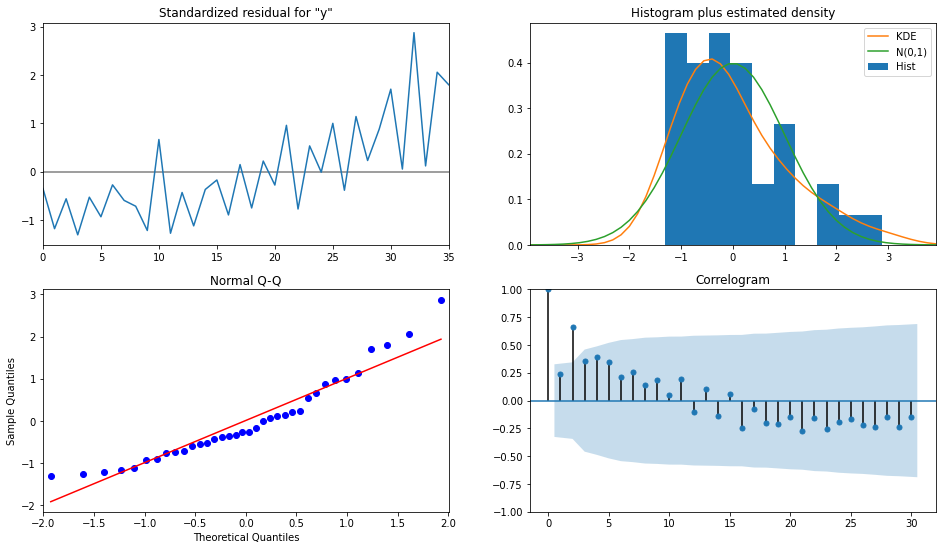

In [16]:
fig = plt.figure(figsize=(16,9))
fig = MA1.plot_diagnostics(fig=fig, lags=30)

In [17]:
MA1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -225.589
Date:                Tue, 29 Jun 2021   AIC                            457.179
Time:                        20:36:42   BIC                            461.929
Sample:                             0   HQIC                           458.837
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        313.3672     38.210      8.201      0.000     238.478     388.257
ma.L1          0.4004      0.162      2.468      0.014       0.082       0.718
sigma2      1.615e+04   4441.939      3.636      0.000    7444.771    2.49e+04
===================================================================================
Ljung-Box (L1) (Q):                   2.17   Jarque-Bera (JB):                 5.65
Prob(Q):                              0.14   Prob(JB):                         0.06
Heteroskedasticity (H):               2.41   Skew:                             0.95
Prob(H) (two-sided):                  0.14   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Nesse caso, nos resíduos conseguimos detectar tanto a sazonalidade quanto os crescimento linear, além disso, mais uma vez, nossa coluna $ P> |z| $ não está totalmente zerada.

#### Gráficos e parâmetros - MA2 ( p = 0, q = 2 )

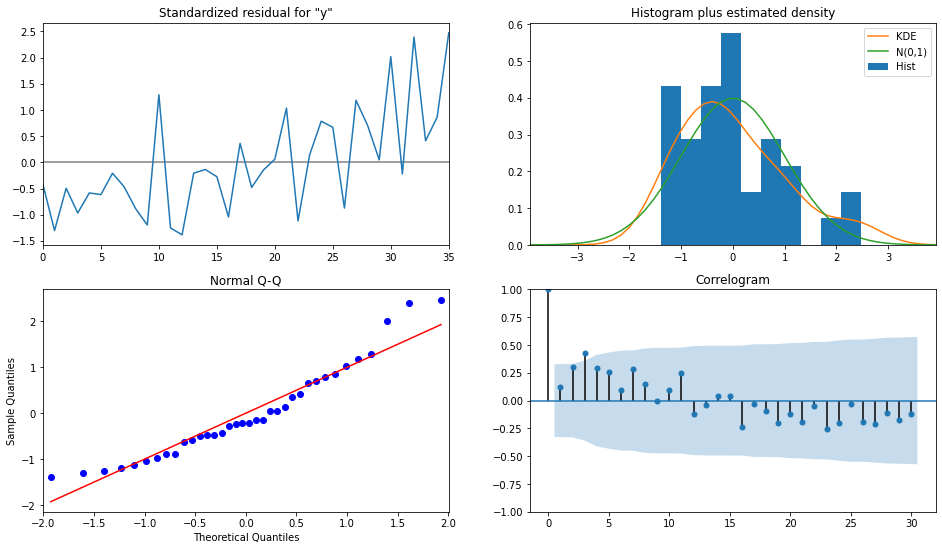

In [18]:
fig = plt.figure(figsize=(16,9))
fig = MA2.plot_diagnostics(fig=fig, lags=30)

In [19]:
MA2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -218.353
Date:                Tue, 29 Jun 2021   AIC                            444.706
Time:                        20:36:43   BIC                            451.040
Sample:                             0   HQIC                           446.917
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        321.5869     44.939      7.156      0.000     233.509     409.665
ma.L1          0.5100      0.173      2.950      0.003       0.171       0.849
ma.L2          0.6086      0.160      3.811      0.000       0.296       0.922
sigma2      1.055e+04   3194.094      3.304      0.001    4293.134    1.68e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):                 3.96
Prob(Q):                              0.46   Prob(JB):                         0.14
Heteroskedasticity (H):               2.17   Skew:                             0.81
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

O Observado para o modelo anterior $(q = 1)$ se repete para o caso $q=2$, vamos então para os últimos modelos classicos que testaremos.

#### Gráficos e parâmetros - ARMA2 ( p = 1, q = 1 )

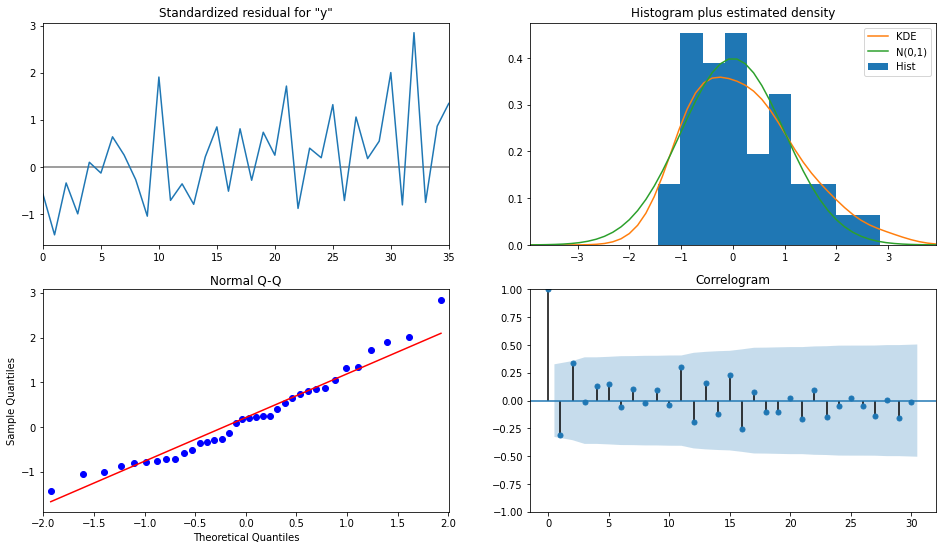

In [20]:
fig = plt.figure(figsize=(16,9))
fig = ARMA1.plot_diagnostics(fig=fig, lags=30)

In [21]:
ARMA1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -211.054
Date:                Tue, 29 Jun 2021   AIC                            430.108
Time:                        20:36:44   BIC                            436.442
Sample:                             0   HQIC                           432.319
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        372.7009    234.968      1.586      0.113     -87.827     833.229
ar.L1          0.9802      0.044     22.343      0.000       0.894       1.066
ma.L1         -0.5855      0.217     -2.695      0.007      -1.011      -0.160
sigma2      6857.3448   1720.649      3.985      0.000    3484.935    1.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   3.66   Jarque-Bera (JB):                 2.41
Prob(Q):                              0.06   Prob(JB):                         0.30
Heteroskedasticity (H):               2.11   Skew:                             0.63
Prob(H) (two-sided):                  0.21   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Temos os gráficos de resíduos parecidos com os obtidos para o caso Auto Regressivo de ordem 1, porém com menos aleatoriedade. Além disso, parece haver uma possível rejeição da constate $ (P> |z| - 0.113)$ 

Vamos então para o último modelo clássico:


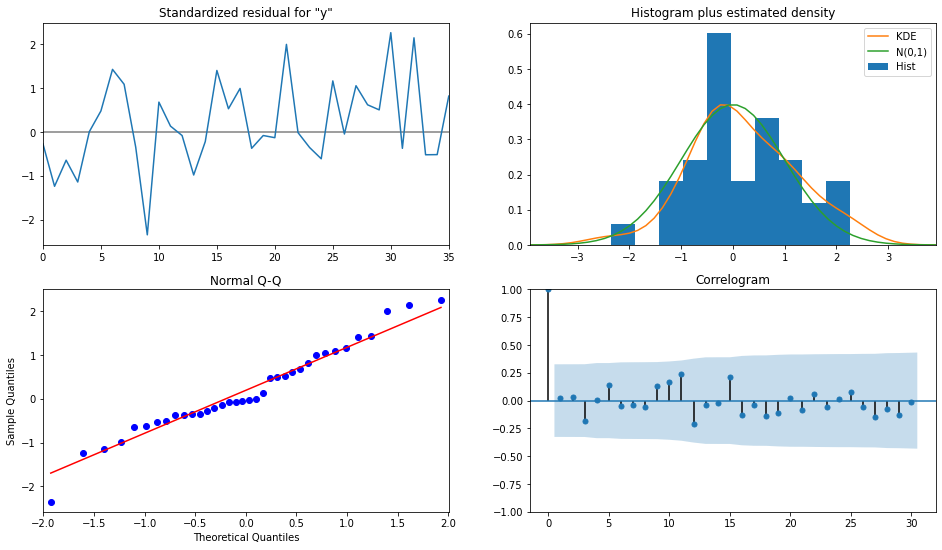

In [22]:
fig = plt.figure(figsize=(16,9))
fig = ARMA2.plot_diagnostics(fig=fig, lags=30)

In [23]:
ARMA2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -202.976
Date:                Tue, 29 Jun 2021   AIC                            417.951
Time:                        20:36:45   BIC                            427.452
Sample:                             0   HQIC                           421.267
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        313.2877    214.393      1.461      0.144    -106.915     733.490
ar.L1          1.0862      0.399      2.722      0.006       0.304       1.868
ar.L2         -0.1199      0.406     -0.295      0.768      -0.915       0.676
ma.L1         -1.3226     30.777     -0.043      0.966     -61.644      58.999
ma.L2          0.9994     46.454      0.022      0.983     -90.050      92.048
sigma2      3685.7227   1.71e+05      0.022      0.983   -3.31e+05    3.38e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.06
Prob(Q):                              0.86   Prob(JB):                         0.97
Heteroskedasticity (H):               1.13   Skew:                             0.09
Prob(H) (two-sided):                  0.83   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Enquanto ao gráfico, conseguimos ver a sazonalidade nos resíduos, o Q-Q plot não está tão alinhando quanto o modelo AR1, e pelo sumario, o modelo está rejeitando quase todas os parâmetros.

### Modelo clássico final.

Dentre os seis modelos que vimos acima, Vamos escolher o Auto regressivo de ordem 2, pois apesar de que a coluna $ P > |z| $ não ser totalmente nula, os valores são baixos, e os résidios apesar de terem uma sazonalidade, não pegaram o crescimento linear que temos na nossa série, e o Q-Q plot ficou bem ajustado.

Vamos então calcular o RMSE usando esse modelo.

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
model_final_c = AR2

pred = model_final_c.predict()
MSE  = mean_squared_error(y_true = data, y_pred = pred)
print('RMSE modelo Auto Regressivo de ordem 1 : ', np.sqrt(MSE))


RMSE modelo Auto Regressivo de ordem 1 :  78.56723361906312


Para finalizar, vamos prever quais seriam os próximos valores previstos pelo nosso modelo:

In [26]:
previ = model_final_c.predict(start = 36, end= 50)
previ

array([587.86106203, 617.40081152, 584.6405659 , 596.32628079,
       576.91634275, 579.85102153, 567.30697936, 566.03675448,
       557.10113059, 553.89139074, 546.92296305, 542.89786999,
       537.06523287, 532.77819038, 527.65596675])

### Prophet - Modelo do facebook.


O Segundo modelo que usaremos será o Prophet, vamos ver como ele se sai com nossa base de dados.


In [27]:
from fbprophet import Prophet

In [28]:
# o profhet só recolhece a base de dados se tiver com as colunas com nomes "ds" e "y"

df1 = df.rename(columns = {"Month": "ds", 'Sales': "y"})

In [29]:
# o profhet também precisa que a coluna das datas esteja em formato de data, porem nossos dados não tem os dias.
# vamos padronizar e por o dia 01 em todas as datas e com o pandas, fazer a transformação para datetime

for i in range(len(df1['ds'])):
  df1['ds'][i] = df1['ds'][i][2:4] + "-01-" + df1['ds'][i][0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
df1['ds'] = pd.to_datetime(df1['ds'])

In [31]:
df1

,ds,y
0,2001-01-01,266.0
1,2001-02-01,145.9
2,2001-03-01,183.1
3,2001-04-01,119.3
4,2001-05-01,180.3
5,2001-06-01,168.5
6,2001-07-01,231.8
7,2001-08-01,224.5
8,2001-09-01,192.8
9,2001-10-01,122.9


Agora que fizemos todo o pré-processamento dos dados para usar o Profhet, podemos criar nosso modelo, vamos primeiro criar um modelo sem sazonalidade e depois um modelo com sazonalidade semanal, pois já vimos gráficamente que não temos sazonalidade anual e nossos dados não estão organizados por dias e sim por meses, logo a sazonalidade semanal, vai conseguir fazer uma modelagem melhor.

### Modelo sem sazonalidade.

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


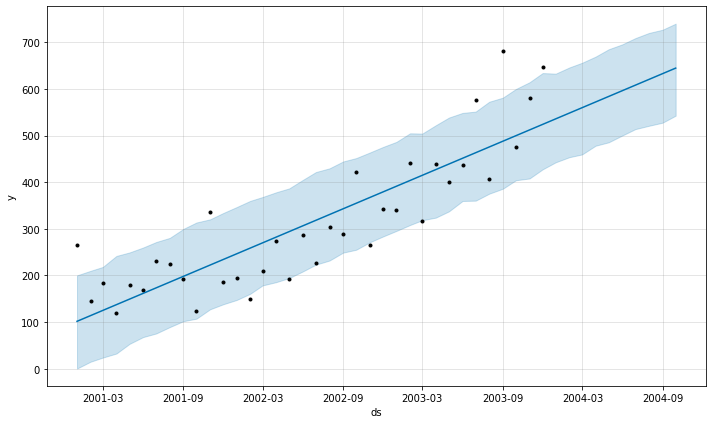

In [32]:
model = Prophet( 
    weekly_seasonality=False, 
    daily_seasonality=False,
    yearly_seasonality=False,
)
model.fit(df1)

future = model.make_future_dataframe(periods=10, freq='M')

forecast = model.predict(future)
fig1 = model.plot(forecast)

De maneira geral conseguimos um bom resultado, porém vemos gráficamente que nos últimos períodos os valores das vendas talvez não cresca de maneira linear, então apesar da faixa de previsão englobar bem nossos dados, temos uma grande chance de overfiting.

Vamos então colocar uma sazonalidade de período semanal.

In [33]:
model_sa = Prophet(
    weekly_seasonality= True, 
    daily_seasonality=False,
    yearly_seasonality=False,
)
model_sa.fit(df1)

future = model_sa.make_future_dataframe(periods=5, freq = "M")

forecast = model_sa.predict(future)

### Graficamente.

In [34]:
forecast1 = pd.concat([forecast, df1], axis = 1)

<Figure size 1440x864 with 0 Axes>

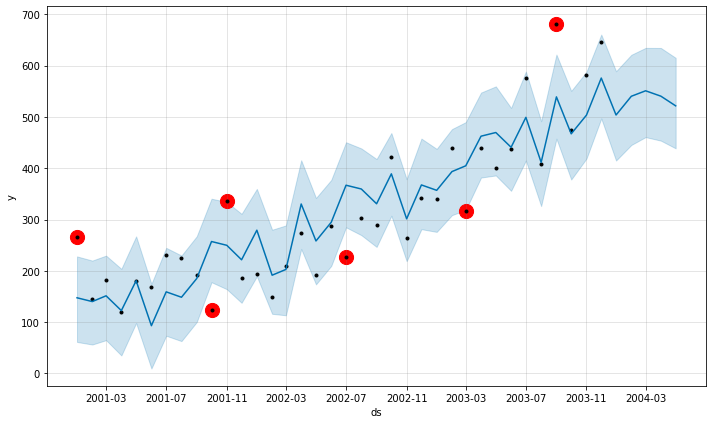

In [35]:
plt.figure(figsize=(20,12))
fig1 = model.plot(forecast)
plt.scatter(df1.loc[(forecast1['y']>forecast1['yhat_upper']) | (forecast1['y']< forecast1['yhat_lower'])].ds,
            df1.loc[(forecast1['y']>forecast1['yhat_upper']) |(forecast1['y']< forecast1['yhat_lower'])].y, c = 'red', s = 200)
plt.show()

Dos 36 pontos, o modelo com sazonalidade semanal não consegui detectar 6 dentro da faixa.

Esse então será nosso modelo profhet final, vamos então calcular o mse.

In [36]:
model_final_p = model_sa
pred = model_final_p.predict()

In [37]:
MSEf = mean_squared_error(y_true= data, y_pred= np.asarray(pred['yhat']))

In [38]:
print('RMSE modelo Profhet com sazonalidade semanal : ', np.sqrt(MSEf))

RMSE modelo Profhet com sazonalidade semanal :  65.8860500508529


Para finalizar o notebook, repetiremos as previsões futuras feitas pelo modelo Auto Regressivo de ordem 1, e as previsões futuras feita pelo Profhet.

In [39]:
previ_profhet = np.asarray(forecast['yhat'].tail(5))

In [40]:
previ_AR1 =  model_final_c.predict(start = 36, end= 40)

In [41]:
previ_AR1

array([587.86106203, 617.40081152, 584.6405659 , 596.32628079,
       576.91634275])

In [42]:
previ_profhet

array([503.85962975, 540.38989403, 551.07206001, 540.576537  ,
       521.71441168])

Lembrando que o RMSE do modelo AR de ordem 2 que escolhemos foi de $78.57$, enquanto no Prophet conseguimos um RMSE de $65.88$. 

Logo é esperado que a previsão dos dois modelos sejam parecidas. Tendo em vista isso, se for pra escolher um modelo final, escolheriamos o Prophet.

Finalizamos aqui nosso notebook.